# Final Project, Part 1
## Data Exploration
## Group 2
### Ruixin Han, Shivani Dhavala, Trishla Nair, Wesley Au

In [3]:
import bqplot
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from pathlib import Path
print(Path.cwd())

C:\Users\Trish\Documents\IS445\Assignments\Final_Project\part_2


In [5]:
import altair as alt
from vega_datasets import data

### Manipulation of the dataset
When I first tried to open the CSV file, I got an error saying 'ParserError: Error tokenizing data. C error: Expected 39 fields in line 138, saw 40'. Then, I tried to trace the error by looking up in google and added "on_bad_lines='skip'" after the path of the file.
https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data

In [6]:
storm = pd.read_csv("storm_data_search_results.csv", on_bad_lines='skip')
storm

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,...,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
0,5139144,MACOUPIN CO.,SHIPMAN,4/20/2000,659,Tornado,,1,0,0,...,SHIPMAN,4/20/2000,659,39.13333,-90.05000,39.13333,-90.05000,A small tornado (low end of F1) struck briefly...,NaN,1
1,5141865,LOGAN CO.,LINCOLN,4/20/2000,800,Tornado,,0,0,0,...,LINCOLN,4/20/2000,800,40.11667,-89.41667,40.11667,-89.41667,A tornado touched down briefly in a field 4 mi...,NaN,2
2,5141481,SANGAMON CO.,ILLIOPOLIS,4/20/2000,805,Tornado,,0,0,0,...,ILLIOPOLIS,4/20/2000,805,40.40000,-89.41667,40.40000,-89.41667,A tornado briefly touched down one mile south ...,NaN,3
3,5141936,MACON CO.,OREANA,4/20/2000,830,Tornado,,1,0,0,...,OREANA,4/20/2000,840,39.95000,-88.85000,39.98333,-88.81667,The tornado touched down 1.8 miles northeast o...,NaN,4
4,5141869,MACON CO.,FORSYTH,4/20/2000,830,Tornado,,1,0,0,...,FORSYTH,4/20/2000,831,39.95000,-88.95000,39.95000,-88.95000,The tornado touched down west northwest of the...,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5521739,PIATT CO.,CISCO,7/26/2006,1810,Tornado,,0,0,0,...,CISCO,7/26/2006,1811,40.00000,-88.76667,39.98333,-88.75000,A tornado briefly touched down in a field caus...,NaN,496
496,5521740,VERMILION CO.,ROSSVILLE,7/26/2006,1815,Tornado,,1,0,0,...,ROSSVILLE,7/26/2006,1823,40.38333,-87.70000,40.41667,-87.66667,A tornado touched down 2 miles west of Rossvil...,NaN,497
497,5521741,PIATT CO.,CISCO,7/26/2006,1822,Tornado,,0,0,0,...,CISCO,7/26/2006,1822,40.01667,-88.68333,40.01667,-88.68333,A tornado briefly touched down in a field and ...,NaN,498
498,5521742,PIATT CO.,CISCO,7/26/2006,1825,Tornado,,0,0,0,...,CISCO,7/26/2006,1825,40.01667,-88.65000,40.01667,-88.65000,A tornado briefly touched down in a field and ...,NaN,499


In [7]:
storm.BEGIN_LAT.value_counts()

40.20000    9
39.56667    8
40.46667    7
40.11667    7
40.15000    7
           ..
41.43333    1
41.50000    1
37.35000    1
41.86667    1
37.33333    1
Name: BEGIN_LAT, Length: 220, dtype: int64

In [8]:
storm.END_LAT.value_counts()

39.56667    7
39.58333    7
40.75000    7
39.80000    7
39.90000    6
           ..
42.11667    1
42.21667    1
38.38333    1
38.50000    1
39.13333    1
Name: END_LAT, Length: 223, dtype: int64

**Use projection in vege Lite to map the longitude and latitude value from csv file** https://vega.github.io/vega-lite/docs/projection.html

In [9]:
brush = alt.selection_interval(encodings=['x','y'])

In [10]:
chart3 = alt.Chart.from_dict({
  "config": {"view": {"continuousWidth": 400, "continuousHeight": 300}},
  "width": 500,
  "height": 300,
  "data": {"url": "https://raw.githubusercontent.com/hanlily666/hanlily666.github.io/main/storm.csv"},
  "projection": {"type": "albersUsa"},
  "mark": "circle",
  "encoding": {
    "longitude": {
      "field": "BEGIN_LON",
      "type": "quantitative"
    },
    "latitude": {
      "field": "BEGIN_LAT",
      "type": "quantitative"
    },
    "size": {"value": 10},
    "tooltip": [
      {"field": "BEGIN_LOCATION", "type": "nominal", "title": "Tornado Begin Location"}
    ]
  }
})
# .add_selection(
#     brush
# )

chart3

alt.Chart(...)

In [11]:
slider = alt.binding_range(min=0, max=1, step=0.05, name='opacity:')
# op_var = alt.param(value=0.1, bind=slider)

chart1 = alt.Chart.from_dict({
  #// Data
  "data": {"url":"https://raw.githubusercontent.com/hanlily666/hanlily666.github.io/main/storm.csv"},
  #// Marks
  "mark":"rect", 
# equivalent to grid heat map
  "height":400,
  #// Encoding (note:error for encoding vs encodings)
  "encoding":{
    #//"x":{"field":"Student_teacher_ratio", "type":"quantitative"},
    "x":{"field":"BEGIN_LAT", "type":"quantitative"},
    "y":{"field":"BEGIN_LON","type":"quantitative"},
    "color":{"aggregate":"count", "type":"quantitative"} 
    #// will show the number of records with a specific student/teacher ratio in a particular state
  }
  
})
# .add_params(
#     op_var
# ) 

chart1

alt.Chart(...)

In [12]:
chart2 = alt.Chart.from_dict({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "config": {"view": {"continuousWidth": 400, "continuousHeight": 300}},
  "data": {
    "url": "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/illinois-counties.geojson",
    "format": {"property": "features"}
  },
  "mark": "geoshape",
  "encoding": {
    "shape":{"type":"geojson"},
#     "tooltip": [
#       {"field": "properties.coordinates", "type": "MultiPolygon", "title": "Coordinates"}
#     ]
  },
  "height": 300,
  "width": 500
})
chart2
# slider = alt.binding_range(min=0, max=1, step=0.05, name='opacity:')
# # op_var = alt.param(value=0.1, bind=slider)

# chart1 = alt.Chart.from_dict({
#   #// Data
#   "data": {"url":"https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/illinois-counties.geojson"},
#   #// Marks
#   "mark":"rect", 
# # equivalent to grid heat map
#   "height":400,
#   #// Encoding (note:error for encoding vs encodings)
#   "encoding":{
#     #//"x":{"field":"Student_teacher_ratio", "type":"quantitative"},
#     "x":{"field":"BEGIN_LAT", "type":"quantitative"},
#     "y":{"field":"BEGIN_LON","type":"quantitative"},
#     "color":{"aggregate":"count", "type":"quantitative"} 
#     #// will show the number of records with a specific student/teacher ratio in a particular state
#   }
  
# })
# # .add_params(
# #     op_var
# # ) 

# chart1

alt.Chart(...)

### Write-up for Plot
- At first, I don't how I can use the relative path to extract the data. Then, Professor Naiman suggested that I can host the data fist and use the link to extract the data most importantly using the raw data. Therefore, I sucessfully extract the data by using the raw file hosted by the Github. 
- After listing the value counts of the beginning latitude and end latitude, I found that there are some locations appeared more times than others. However, this heatmap only displays the count of latitude value. In the next step, I hope that we can come up with a solution that can both display the latitude and the longitude, where I can make a dashboard to use the longitude and latitude value and map out on the Illinois map.

In [13]:
storm[['BEGIN_LOCATION','END_LOCATION','BEGIN_LAT','BEGIN_LON','END_LAT','END_LON']]

,BEGIN_LOCATION,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
0,SHIPMAN,SHIPMAN,39.13333,-90.05000,39.13333,-90.05000
1,LINCOLN,LINCOLN,40.11667,-89.41667,40.11667,-89.41667
2,ILLIOPOLIS,ILLIOPOLIS,40.40000,-89.41667,40.40000,-89.41667
3,OREANA,OREANA,39.95000,-88.85000,39.98333,-88.81667
4,FORSYTH,FORSYTH,39.95000,-88.95000,39.95000,-88.95000
...,...,...,...,...,...,...
495,CISCO,CISCO,40.00000,-88.76667,39.98333,-88.75000
496,ROSSVILLE,ROSSVILLE,40.38333,-87.70000,40.41667,-87.66667
497,CISCO,CISCO,40.01667,-88.68333,40.01667,-88.68333
498,CISCO,CISCO,40.01667,-88.65000,40.01667,-88.65000


In [14]:
il = geopandas.read_file('https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/illinois-counties.geojson')

### Originality of the Data
We found this dataset through the open source dataset for the map of IL. Since we are trying to map out the storm data  through data visualization, this dataset basically is a geojson file of the map.

In [15]:
il.head()

,name,co_fips,cartodb_id,created_at,updated_at,geometry
0,Greene,61,1,2014-12-26T02:19:38+00:00,2014-12-26T02:21:22+00:00,"MULTIPOLYGON (((-90.30195 39.52063, -90.28319 ..."
1,Clinton,27,2,2014-12-26T02:19:38+00:00,2014-12-26T02:21:22+00:00,"MULTIPOLYGON (((-89.59725 38.74320, -89.57489 ..."
2,Tazewell,179,11,2014-12-26T02:19:38+00:00,2014-12-26T02:21:22+00:00,"MULTIPOLYGON (((-89.26932 40.59450, -89.26917 ..."
3,Fulton,57,12,2014-12-26T02:19:38+00:00,2014-12-26T02:21:22+00:00,"MULTIPOLYGON (((-89.98606 40.71224, -89.98652 ..."
4,Adams,1,13,2014-12-26T02:19:38+00:00,2014-12-26T02:21:22+00:00,"MULTIPOLYGON (((-91.50534 40.20028, -91.49183 ..."


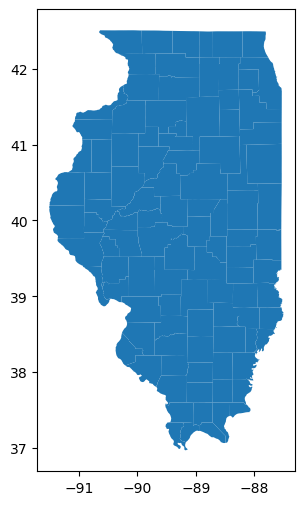

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
il.plot(ax=ax)
plt.show()

In [17]:
import contextily as ctx

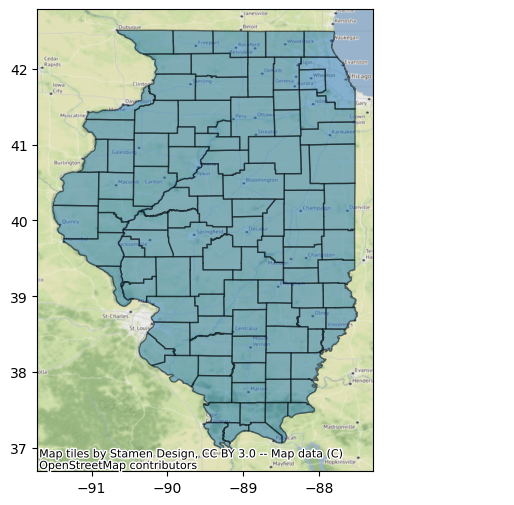

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
il.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, crs=il.crs)
# The code is referenced from the Professor Naiman's in-class notes, and I comment out these two lines to edit later.
# These are the parameters of the iSchool location.
# ax.set_xlim(-88.245, -88.225)
# ax.set_ylim(40.10, 40.125) 
plt.show()

### Write-up for Plot
Since in the first dataset, we have the information about the start location and end lcoation of a tornado event that happened in Illinois. We can potentially use that information to 

1. Summarize the characteristics of the dataset in words: what does it represent, what are the fields/columns/rows, what data types are they, etc 
- The first dataset contains the start location and end location of the tornado event that happened in illinois, which it also has the start longitude, latitude and end longitude, latitude displayed in the dataframe. 
- The second dataset is Geojson file for a map of Illinois.
2. What is the "name" of the dataset?
- Storm Events Database
- Map of Illinois, US
3. Where did you obtain it
-  The first dataset is from the National Centers for Environmental Information. 
- We found the map through an open source that has the geojson file of the Illinois map.
4. Where can we obtain it? (i.e., URL)
- https://www.ncdc.noaa.gov/stormevents/listevents.jsp?eventType=%28C%29+Tornado&beginDate_mm=01&beginDate_dd=01&beginDate_yyyy=2000&endDate_mm=12&endDate_dd=31&endDate_yyyy=2022&county=ALL&hailfilter=0.00&tornfilter=0&windfilter=000&sort=DT&submitbutton=Search&statefips=17%2CILLINOIS
- https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/illinois-counties.geojson
5. What is the license of the dataset? 
- These two dataset are all in public domain, which means that we are not restricted with the use of the dataset. 
6. How big is it in file size and in items? 
- The first dataset has 497 rows × 39 columns
- The second dataset has 102 rows × 6 columns 
- Regards to the Github upload limit, we haven't had any difficulty to upload the data to the Github.